(cell_classification.object_classification)=
# Objektklassifizierung auf OpenCL-kompatiblen GPUs
APOC basiert auf [pyclesperanto](https://github.com/clEsperanto/pyclesperanto_prototype) und [scikit-learn](https://scikit-learn.org/stable/). Es ermöglicht die Klassifizierung von Objekten anhand gemessener Eigenschaften / Merkmale wie Intensität, Form und Anzahl benachbarter Zellen.

In [1]:
import apoc

from skimage.io import imread, imsave
import pyclesperanto_prototype as cle
import numpy as np
import matplotlib.pyplot as plt

Für die Objektklassifizierung benötigen wir ein Intensitätsbild und ein Labelbild als Eingabe.

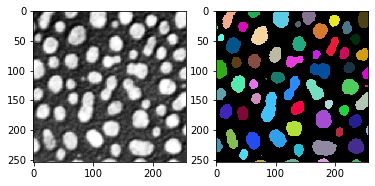

In [2]:
# load intensity image
image = imread('../../data/blobs.tif')

# segment the image
labels = cle.label(cle.threshold_otsu(image))

fig, axs = plt.subplots(1, 2)

cle.imshow(image, color_map="Greys_r", plot=axs[0])
cle.imshow(labels, labels=True, plot=axs[1])

## Training
Wir benötigen auch ein Ground-Truth-Annotationsbild. Dieses Bild ist ebenfalls ein Labelbild mit einer spärlichen Annotation. Eine Linie mit dem Wert `1` wurde durch alle Objekte gezogen, die zur Klasse `1` gehören sollen. Eine Linie mit dem Wert `2` wurde durch alle Objekte gezogen, die als Klasse `2` klassifiziert werden sollen. Wenn die Linie den Hintergrund kreuzt, wird dies ignoriert. In diesem Beispiel wurden Objekte in drei Klassen annotiert:
* Längliche Objekte
* Rundliche Objekte
* Kleine Objekte

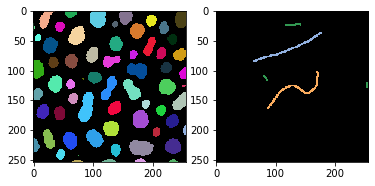

In [3]:
annotation = cle.push(imread('../../data/label_annotation.tif'))

fig, axs = plt.subplots(1, 2)

cle.imshow(labels, labels=True, plot=axs[0])
cle.imshow(annotation, labels=True, plot=axs[1])

Als Nächstes müssen wir definieren, welche Merkmale wir für die Klassifizierung von Objekten verwenden möchten. Wir werden Fläche, Form und die Standardabweichung der Intensität verwenden.

In [4]:
features = 'area mean_max_distance_to_centroid_ratio standard_deviation_intensity'

In [5]:
# Create an object classifier
filename = "../../data/blobs_object_classifier.cl"
classifier = apoc.ObjectClassifier(filename)

# train it; after training, it will be saved to the file specified above
classifier.train(features, labels, annotation, image)

Nachdem der Klassifikator trainiert wurde, können wir ihn sofort verwenden, um die Klassifizierung der Objekte im Bild vorherzusagen.

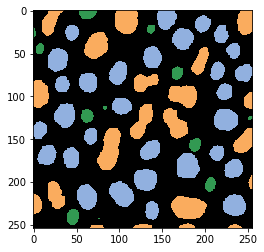

In [6]:
# determine object classification
classification_result = classifier.predict(labels, image)

cle.imshow(classification_result, labels=True)

## Vorhersage
Sie können den Klassifikator auch von der Festplatte neu laden und auf andere Bilder anwenden. Wir werden dies simulieren, indem wir das Originalbild drehen. Dies ist übrigens eine gute Überprüfung, um zu sehen, ob die Klassifizierung von der Ausrichtung des Bildes abhängt.

In [7]:
image2 = cle.rotate(image, angle_around_z_in_degrees=90)
labels2 = cle.rotate(labels, angle_around_z_in_degrees=90)

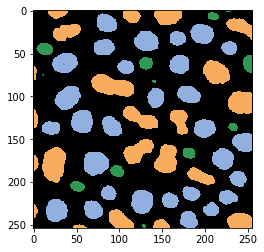

In [8]:
classifier2 = apoc.ObjectClassifier("../../data/blobs_object_classifier.cl")

classification_result2 = classifier2.predict(labels2, image2)

cle.imshow(classification_result2, labels=True)

## Verfügbare Merkmale für die Objektklassifizierung
Wir können alle verfügbaren Merkmale ausgeben. Parameter mit einem `?` erwarten an dieser Stelle eine Zahl und können mehrfach mit verschiedenen Werten angegeben werden.

In [9]:
apoc.list_available_object_classification_features()

['label',
 'original_label',
 'bbox_min_x',
 'bbox_min_y',
 'bbox_min_z',
 'bbox_max_x',
 'bbox_max_y',
 'bbox_max_z',
 'bbox_width',
 'bbox_height',
 'bbox_depth',
 'min_intensity',
 'max_intensity',
 'sum_intensity',
 'area',
 'mean_intensity',
 'sum_intensity_times_x',
 'mass_center_x',
 'sum_intensity_times_y',
 'mass_center_y',
 'sum_intensity_times_z',
 'mass_center_z',
 'sum_x',
 'centroid_x',
 'sum_y',
 'centroid_y',
 'sum_z',
 'centroid_z',
 'sum_distance_to_centroid',
 'mean_distance_to_centroid',
 'sum_distance_to_mass_center',
 'mean_distance_to_mass_center',
 'standard_deviation_intensity',
 'max_distance_to_centroid',
 'max_distance_to_mass_center',
 'mean_max_distance_to_centroid_ratio',
 'mean_max_distance_to_mass_center_ratio',
 'touching_neighbor_count',
 'average_distance_of_touching_neighbors',
 'average_distance_of_n_nearest_neighbors=?',
 'average_distance_of_n_nearest_neighbors=?']